In [1]:
import pandas as pd
from transformers import pipeline

# 1. Load model sentiment Indonesia
classifier = pipeline(
    "text-classification",
    model="w11wo/indonesian-roberta-base-sentiment-classifier"
)

# 2. Baca data
df = pd.read_csv("scrapped_data_cod_preprocessed.csv")
print(f"Data loaded: {len(df)} rows")

# 3. Bersihkan NaN di final_text (biar tidak error)
df['final_text'] = df['final_text'].fillna("")

# 4. Jalankan sentiment analysis
labels = []
scores = []

for text in df['final_text']:
    try:
        result = classifier(text)[0]       # ambil hasil pertama
        labels.append(result['label'])     # label: positive/negative/neutral
        scores.append(result['score'])     # confidence score
    except Exception as e:
        labels.append("ERROR")
        scores.append(0.0)

# 5. Masukkan ke DataFrame
df['sentiment_label'] = labels
df['sentiment_score'] = scores

print(df[['final_text','sentiment_label','sentiment_score']].head())

# 6. Simpan ke CSV
df.to_csv("hasil_sentimen.csv", index=False)
print("✅ Sentiment analysis selesai dan disimpan ke 'hasil_sentimen_roberta.csv'")

Device set to use cpu


Data loaded: 4115 rows
      final_text sentiment_label  sentiment_score
0  masalah besok        negative         0.997823
1                          ERROR         0.000000
2                          ERROR         0.000000
3                          ERROR         0.000000
4          rumah        negative         0.657418
✅ Sentiment analysis selesai dan disimpan ke 'hasil_sentimen_roberta.csv'


In [3]:
# hitung jumlah masing-masing label
print(df['sentiment_label'].value_counts())

sentiment_label
positive    1338
ERROR       1103
negative     901
neutral      773
Name: count, dtype: int64


Text(0.5, 1.0, 'Perbandingan Sentimen\n(Pie Chart)')

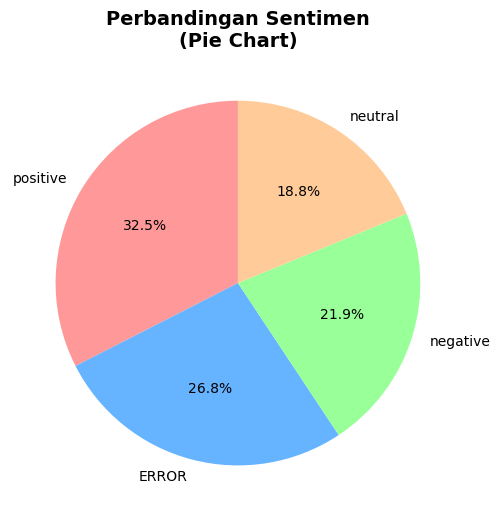

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

sentiment_counts = df['sentiment_label'].value_counts()

plt.subplot(2, 3, 1)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
        colors=colors[:len(sentiment_counts)], startangle=90)
plt.title('Perbandingan Sentimen\n(Pie Chart)', fontsize=14, fontweight='bold')